# Monte-Carlo Stock Price Predictor

In [1]:
# Import libraries
import requests
import os
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# Read in Adj Close prices from csv
stock_df = pd.read_csv("../Resources/stock_historical_prices.csv", index_col="Date", infer_datetime_format=True, parse_dates=True)['Adj Close']
stock_df = stock_df.sort_index()
stock_df.tail()

Date
2021-03-15    395.115906
2021-03-16    394.617523
2021-03-17    395.963135
2021-03-18    390.201996
2021-03-19    389.480011
Name: Adj Close, dtype: float64

In [3]:
# Calculate stock returns
returns = stock_df.pct_change()
returns.dropna(inplace=True)
returns.head()

Date
2015-03-19   -0.004561
2015-03-20    0.008827
2015-03-23   -0.001949
2015-03-24   -0.005619
2015-03-25   -0.014654
Name: Adj Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

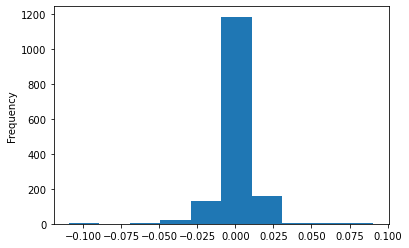

In [4]:
# Plot frequency distribution of returns
returns.plot(kind="hist")

In [5]:
# Calculate mean and standard dev of returns
mean = returns.mean()
std = returns.std()
(mean, std)

(0.0005542495388270042, 0.011585716423659555)

In [6]:
from random import gauss
# Calculate the specific normal distribution of analyzed stock based on its average returns and standard deviation
gauss(mean, std)

0.003995295762284726

In [7]:
# Read in last stock price
last_val = stock_df.iloc[-1]
last_val

389.4800109863281

In [8]:
# Simulate the next stock value based on probability distribution
last_val * (1+gauss(mean,std))

385.38798829300356

In [9]:
# Simulate stock values for the next 15 days
simvals = [last_val]
days=15

for day in range(days):
    newval = simvals[-1] * (1+gauss(mean,std))
    simvals.append(newval)

simvals

[389.4800109863281,
 389.8980236262276,
 393.65017463374244,
 389.8504118628091,
 394.0658693512573,
 397.3724323646316,
 387.9099549841477,
 389.1728231483556,
 387.9223641565655,
 386.8007533320526,
 372.47018934051016,
 375.06192820713545,
 371.4470465429208,
 374.26142689537204,
 376.3847670558945,
 379.3594977354894]

In [10]:
# Function to simulate stock prices
def simulate_stocks(days,starting_val):
    simvals = [starting_val]
    
    for day in range(days):
        newval = simvals[-1] * (1+gauss(mean,std))
        simvals.append(newval)
        
    return simvals

In [11]:
# Simulate next 15 day stock prices based on the last price
simulate_stocks(15,last_val)

[389.4800109863281,
 396.73360038204817,
 394.5478123708791,
 392.9793871156296,
 397.13265284621326,
 395.01704808788526,
 401.197357368754,
 401.32524774839976,
 401.9337811073872,
 403.1524265781592,
 404.682801484581,
 410.3141844636334,
 423.0006139333926,
 429.2602082775581,
 422.87178610111675,
 414.6416493781292]

In [12]:
# Simulate stock prices based on 1000 different random scenarios
trials =1000
results = []
for trial in range(trials):
    results.append(simulate_stocks(15,last_val))

In [13]:
# Create dataframe of possible stock prices based on 1000 random scenarios
pd.DataFrame(results).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,389.480011,393.226099,396.826536,398.501986,397.922761,396.879295,400.090615,397.628321,405.545577,409.653254,409.278135,411.922628,412.489629,419.492841,421.099478,425.938299
1,389.480011,387.856166,376.850178,374.717075,373.077443,364.337114,368.186830,368.485505,371.423810,372.941914,369.746998,365.359266,362.934145,363.256583,362.647182,367.840851
2,389.480011,387.708809,387.829269,388.361998,385.975968,381.535159,385.657523,395.607490,392.544315,390.171770,400.796918,396.456454,398.998835,403.857767,406.169870,400.496338
3,389.480011,389.569486,392.928387,390.920932,391.866395,388.816945,381.522366,381.744178,386.432245,387.108342,390.659358,400.677554,406.465342,404.311118,400.704533,401.046575
4,389.480011,393.535491,389.182487,388.593524,386.698415,385.269236,385.242214,373.569546,369.258570,370.089881,368.878341,370.698394,372.097970,370.316663,371.446866,370.560802


In [14]:
# Possible outcomes based on the each of 1000 scenarios (transformed dataframe)
results_df = pd.DataFrame(results).T
results_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
11,411.922628,365.359266,396.456454,400.677554,370.698394,389.020132,403.095914,400.177590,402.213788,426.715990,...,383.641205,384.050201,393.400770,395.463619,383.118437,387.735529,381.533143,396.112585,406.051363,399.634878
12,412.489629,362.934145,398.998835,406.465342,372.097970,391.415873,401.608369,403.504438,402.112261,427.050029,...,391.104978,379.309219,393.856339,398.077187,384.309468,394.676687,386.667225,398.816686,407.146051,392.385719
13,419.492841,363.256583,403.857767,404.311118,370.316663,382.874064,398.042320,400.610667,411.797534,429.057961,...,395.939119,383.539192,393.117001,386.636002,384.870524,388.076613,385.076446,402.093810,410.353925,386.314483
14,421.099478,362.647182,406.169870,400.704533,371.446866,382.148753,398.617972,400.819627,407.062424,431.769086,...,400.234253,387.685682,392.033438,382.367137,388.978798,388.302190,384.928101,394.822625,416.676557,386.163418
15,425.938299,367.840851,400.496338,401.046575,370.560802,386.592498,399.719855,409.213270,412.825035,443.369140,...,398.945194,386.344244,391.538167,381.591194,392.510128,381.089782,383.229746,392.703329,420.408232,390.653822


<AxesSubplot:>

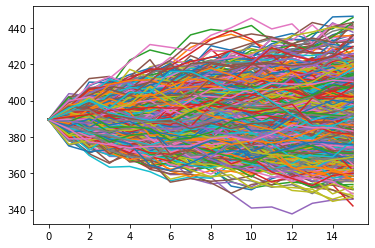

In [15]:
# Plot all possible stock price scenarios
results_df.plot(legend=False)

In [16]:
# Read in the end values (15th day) from the simulation
end_values = results_df.iloc[-1]
end_values.head()

0    425.938299
1    367.840851
2    400.496338
3    401.046575
4    370.560802
Name: 15, dtype: float64

<AxesSubplot:ylabel='Frequency'>

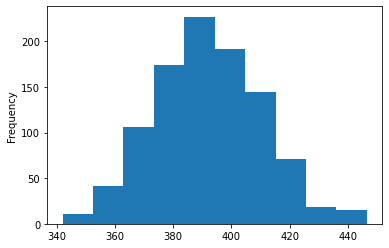

In [17]:
# Plot the probability distribution of end values from the simulation
end_values.plot(kind="hist")

In [18]:
# Calculate the range of possible prices 
end_values.quantile([0.1,0.9])

0.1    368.162866
0.9    415.743703
Name: 15, dtype: float64

In [19]:
# Read in last stock price
last_val

389.4800109863281